<div style="direction:rtl;line-height:300%;"><font face="B Titr" size=5>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<div align=center>
<font face="B Titr" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
مبانی بیوانفورماتیک
</font>
<br>
محسن نقی‌پورفر

<br>
۹۴۱۰۶۷۵۷
</div>
<hr/>
<font color=red size=6>
<p></p>



<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>

<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#section1">قسمت اول: توالی</a></li>
<li><a href="#section2">قسمت دوم: تشکیل درخت زندگی</a></li>
<li><a href="#section3">قسمت سوم: تخمین گذشته، پیش‌بینی آینده!</a></li>
<li><a href="#section4">قسمت چهارم: منابع و مآخذ</a></li>
</ul>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section1" color=#FF7500 size=6>
قسمت اول: توالی
</font>
</h1><p></p>
سلام! به پروژه مبانی بیوانفورماتیک خوش آمدید! در این قسمت از پروژه قرار است، داده های مورد نیاز را از فایل‌ها بخوانیم و آنها را پردازش کنیم. ابتدا داده‌های مربوط به توالی ژنوم های گونه های مختلف ویروس ابولا و ژن های ویروس ماربرگ را خوانده، سپس با استفاده از توالی ژن های این ویروس، و داشتن ترتیب آمدن این ژن‌ها در توالی ویروس ابولا، با استفاده از الگوریتم های هم‌ترازی سعی در یافتن این توالی‌ها در گونه ‌های مختلف این ویروس می‌کنیم.
<br>
<br>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#FF7500> 
<b>
توجه: 
</b>
</font>
این پروژه در یک مخزن گیت‌هاب نگه داری می‌شود. برای مراجعه به آن می‌توانید به <a href="http://github.com/MohsenNp/Ebolavirus">اینجا</a> مراجعه فرمایید. همچنین این پروژه با زبان پایتون، پیاده‌سازی شده است.
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
درابتدا باتوجه به کدی که در پایی آمده است، متغیر های لازم را تعریف کرده و توابع مورد نیاز را پیاده‌سازی می کنیم. لازم به ذکر است که از پکیج های BioPython، Mathplotlib، Numpy، Pandas و ... استفاده شده است.
</div>

In [1]:
from Bio import SeqIO
from Bio import pairwise2
marburg_genes = [] # list of marburg genes
ebolavirus_genomes = [] # list of ebolavirus genomes 
all_genes = {} # dictionary which maps each geneName to found sequences in ebola genomes
edit_distance_matrices = [[[0 for i in range(5)] for j in range(5)] for k in range(7)] # matrix for edit distances
gene_names = ['GP', 'L', 'VP24', 'VP30', 'VP35', 'VP40', 'NP'] # all 7 gene names

In [2]:
def read_data(): # read data and initialize variables
    global ebolavirus_genomes, marburg_genes
    # read Marburg genes data
    marburg_genes = []
    for seq_record in SeqIO.parse("./Data/Marburg_Genes.fasta", "fasta"):
        marburg_genes.append(seq_record)

    # read Ebolaviruses genome data as seq_record objects
    Bundibugyo_genome = SeqIO.read("./Data/Bundibugyo_genome.fasta", "fasta")
    Reston_genome = SeqIO.read("./Data/Reston_genome.fasta", "fasta")
    Sudan_genome = SeqIO.read("./Data/Sudan_genome.fasta", "fasta")
    TaiForest_genome = SeqIO.read("./Data/TaiForest_genome.fasta", "fasta")
    Zaire_genome = SeqIO.read("./Data/Zaire_genome.fasta", "fasta")
    ebolavirus_genomes = [Bundibugyo_genome, Reston_genome, Sudan_genome, TaiForest_genome, Zaire_genome]

In [3]:
def glocal_alignment(genome, gene, match=1, mismatch=-1, gap_penalty=-1): # Global Local Alignment
    # Lengths of sequences
    len_genome = len(genome) + 1 
    len_gene = len(gene) + 1

    # scores matrix
    scores = [[0 for i in range(len_genome)] for j in range(len_gene)]
    # traceback matrix
    traceback = [[0 for i in range(len_genome)] for j in range(len_gene)]  # to store the trace back path

    for i in range(len_gene): # Adding penalty for gene --> score[i][0] == i * gap_penalty
        scores[i][0] = i * gap_penalty
    for i in range(1, len_gene): # Dynamic Programming Formula
        for j in range(1, len_genome):
            if genome[j - 1] == gene[i - 1]: # if matched
                diagonal = scores[i - 1][j - 1] + match
            else:
                diagonal = scores[i - 1][j - 1] + mismatch

            left = scores[i][j - 1] + gap_penalty # gap
            above = scores[i - 1][j] + gap_penalty # gap
            scores[i][j] = max(left, above, diagonal) # dp formulation

            if scores[i][j] == diagonal:
                traceback[i][j] = 1  # 1 means trace diagonally
            elif scores[i][j] == left:
                traceback[i][j] = 2  # 2 means trace to the left
            else:
                traceback[i][j] = 3  # 3 means trace to the top

    genome_alignment, gene_alignment = '', '' # alignments for printing

    max_j = scores[-1].index(max(scores[-1]))  # stores the number of column which the max number exists in
    while i >= 0 and j >= 0:
        if j > max_j:
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
            continue

        if traceback[i][j] == 1:  # 1 means to trace diagonally
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
            j -= 1
        elif traceback[i][j] == 2:  # 2 means trace to the left
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
        else:  # 3 means trace to the top
            genome_alignment = '-' + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
    score = 0 # Score of alignment
    for i in range(len(genome_alignment)): # Calculate Score of alignment
        if genome_alignment[i] != gene_alignment[i]:
            score += 1 
    # print(genome_alignment)
    # print(gene_alignment)
    return j, max_j, score # returns substring(start, end) indices and score 

In [29]:
def align_and_find_genes(genome): # genome is the sequence of ebolavirus genome
    f = open('./Output/found_genes/' + genome.name + '.csv', "w")
    start = 0
    for gene in marburg_genes: # For each genes found in marburg virus
        len_gene = len(gene.seq)
        end = (start + len_gene * 3) if len(genome) > (start + len_gene * 3) else len(genome)  # Just consider a subsequence of genome
        gene_str = str(gene.seq)
        genome_str = str(genome.seq)[start: end]
        # alignments = pairwise2.align.localmd(gene_str, genome_str, 1, -1, -1, -0.5, 0, 0) # Using biopython alignment function
        # final_alignment = alignments[0]  # final_alignment contains --> [align1, align2, score, begin, end]
        # begin_idx = final_alignment[3] # 3 is begin
        # end_idx = final_alignment[4] # 4 is end
        begin_idx, end_idx, unused = glocal_alignment(genome_str, gene_str) # Apply Global-Local Alignment
        f.write(gene.name + "," + str(start + begin_idx) + "," + str(start + end_idx) + "\n")# write to file
        start = end - len_gene # update start index for the next gene to align
    f.close()

In [4]:
def start_aligning(): # Align all genes to all genomes in the given data
    for genome in ebolavirus_genomes:
        align_and_find_genes(genome)

In [5]:
read_data()
# start_aligning()

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
همانطور که از توابع تعریف شده در بالا مشخص است، با استفاده از این توابع،‌توالی ها را با استفاده از پکیج biopython خوانده و ژن های ویروس ماربرگ را در توالی ژنوم ۵ گونه ویروس ابولا هم تراز کرده و این اندیس ابتدا و انتهای این ژن هارا در فایل های مربوط به هر گونه ذخیره می‌کنیم.

In [6]:
def read_genes(): # read all <genome_name>.csv files for accessing genes in genomes
    global all_genes
    for gene in marburg_genes: # For every gene (7 genes)
        i = 0
        genes = []
        for genome in ebolavirus_genomes: # For every species in ebolavirus
            indices = pd.read_csv("./Output/found_genes/" + genome.name + ".csv", header=None) # read .csv file
            begin_idx = int(indices.loc[i, 1]) # begin index for special gene
            end_idx = int(indices.loc[i, 2]) # end index for special gene
            new_record = SeqIO.SeqRecord(genome.seq[begin_idx: end_idx]) # Create SeqRecord Object File
            new_record.name = genome.name
            genes.append(new_record) # Append to gene list
            i += 1
        all_genes[gene.name] = genes # Append genelist to all_genes dictionary

In [29]:
def global_alignment(genome, gene, match=1, mismatch=-1, gap_penalty=-1):
    # Lengths of sequences
    len_genome = len(genome) + 1
    len_gene = len(gene) + 1

    # scores matrix
    scores = [[0 for i in range(len_genome)] for j in range(len_gene)]
    # traceback matrix
    traceback = [[0 for i in range(len_genome)] for j in range(len_gene)]  # to store the trace back path

    for i in range(len_gene):  # Adding penalty for gene --> score[i][0] == i * gap_penalty
        scores[i][0] = i * gap_penalty
    for i in range(len_genome):  # Adding penalty for gene --> score[0][i] == i * gap_penalty
        scores[0][i] = i * gap_penalty
    for i in range(1, len_gene):  # Dynamic Programming Formula
        for j in range(1, len_genome):
            if genome[j - 1] == gene[i - 1]:  # if matched
                diagonal = scores[i - 1][j - 1] + match
            else:
                diagonal = scores[i - 1][j - 1] + mismatch

            left = scores[i][j - 1] + gap_penalty  # gap
            above = scores[i - 1][j] + gap_penalty  # gap
            scores[i][j] = max(left, above, diagonal)  # dp formulation

            if scores[i][j] == diagonal:
                traceback[i][j] = 1  # 1 means trace diagonally
            elif scores[i][j] == left:
                traceback[i][j] = 2  # 2 means trace to the left
            else:
                traceback[i][j] = 3  # 3 means trace to the top

    genome_alignment, gene_alignment = '', ''  # alignments for printing

    max_j = scores[-1].index(max(scores[-1]))  # stores the number of column which the max number exists in
    while i >= 0 and j >= 0:
        if j > max_j:
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
            continue

        if traceback[i][j] == 1:  # 1 means to trace diagonally
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
            j -= 1
        elif traceback[i][j] == 2:  # 2 means trace to the left
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
        else:  # 3 means trace to the top
            genome_alignment = '-' + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
    score = 0  # Score of alignment
    for i in range(len(genome_alignment)):  # Calculate Score of alignment
        if genome_alignment[i] != gene_alignment[i]:
            score += 1
    # print(genome_alignment)
    # print(gene_alignment)
    return j, max_j, score  # returns substring(start, end) indices and score


In [30]:
def global_align(): # Global Alignment For calculating score and edit distance matrices
    global edit_distance_matrices
    gene_id = 0
    for gene in all_genes.values(): # Iterate all genes for all genomes
        g1_id = 0
        for genome1 in gene:
            g2_id = 0
            for genome2 in gene:
                if genome1.seq != genome2.seq:
                    if g1_id <= g2_id:
                        continue
                    # alignments = pairwise2.align.globalms(genome1, genome2, 0, -1, -1, -1) # Biopython package
                    # alignment = alignments[0] # first alignment
                    # score = alignment[2] # score of alignment
                    a, b, score = global_alignment(genome1, genome2) # Global Alignment
                    edit_distance = 1 * score # Calculate score of alignment
                    edit_distance_matrices[gene_id][g1_id][g2_id] = edit_distance 
                    edit_distance_matrices[gene_id][g2_id][g1_id] = edit_distance
                g2_id += 1
            g1_id += 1
        gene_id += 1


In [31]:
def save_edit_matrices(): # Save edit distance matrices into files
    i = 0
    for name, gene in all_genes.items():
        edit_matrix = np.array(edit_distance_matrices[i]) # Numpy Package is used here for saving into files
        np.savetxt("./Output/edit_matrices/" + name + ".csv", edit_matrix, delimiter=",", fmt='%d')
        i += 1


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
در این سه قطعه کد، از الگوریتم های Global Alignment و نحوه محاسبه Edit Distance استفاده شده است، که با استفاده از آنها، ماتریس های فاصله را تشکیل می‌دهیم و در فایلی با نام قرارداد شده در پروژه ذخیره می‌کنیم. لازم به ذکر است که در این‌جا از پکیج های Biopython و Numpy استفاده شده است. البته الگوریتم Global Alignment به صورت جدا نیز پیاده‌سازی شده است و در واقع از آن استفاده گردیده و قسمتی که از پکیج Biopython استفاده شده، کامنت گردیده است.

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section2" color=#FF7500 size=6>
قسمت دوم: تشکیل درخت زندگی
</font>


In [16]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

NJ_trees = [] # Trees which are constructed with NJ Algorithm
UPGMA_trees = [] # Trees which are constructed with UPGMA Algorithm

In [10]:
def convert_tu_lower_triangular(data_frame): # Convert data_frame to a lower triangular matrix
    data_frame = data_frame.values.T.tolist() # Convert data_frame to list of lists  
    for i in range(5):
        data_frame[i] = data_frame[i][:i + 1] # Remove unused data from data_frame --> Convert to lower triangular
    return data_frame

In [11]:
def construct_tree(gene_name, type='UPGMA'): # Construct Tree with specific type (Default = UPGMA)
    edit_matrix = pd.read_csv("./Output/edit_matrices/" + gene_name + ".csv", header=None) # read edit matrix file
    constructor = DistanceTreeConstructor() # Create a tree constructor object
    edit_matrix = convert_tu_lower_triangular(edit_matrix) # Convert Edit Distance matrix to lower triangular
    distance_matrix = DistanceMatrix(names=['Bundibugyo', 'Reston', 'Sudan', 'TaiForest', 'Zaire'], matrix=edit_matrix)
    if type == 'NJ': # Neighbor-Joining Alogrithm
        tree = constructor.nj(distance_matrix)
    else: # UPGMA Algorithm
        tree = constructor.upgma(distance_matrix)
    save_tree(tree, type + '_' + gene_name) # Save Tree into a file
    return tree

In [12]:
def save_tree(tree, filename):
    Phylo.draw(tree) # Draw the tree
    plt.title(filename) # set Title for figure
    plt.savefig('./Output/images/' + filename + '.png', dpi=100) # Save tree in an image
    plt.close() # Close the figure

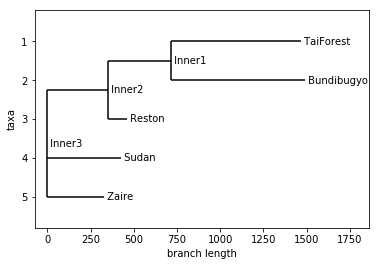

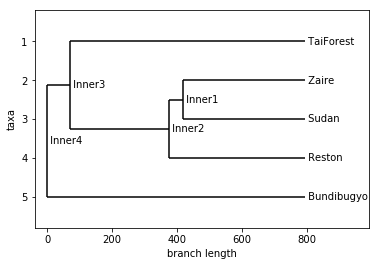

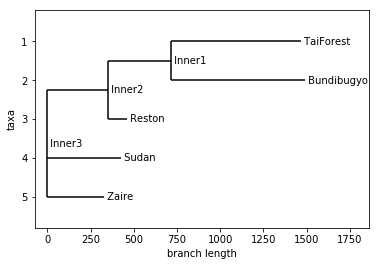

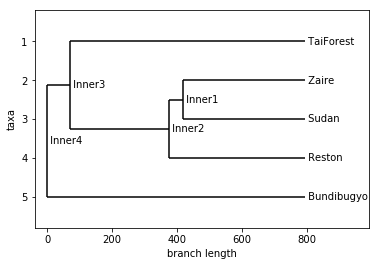

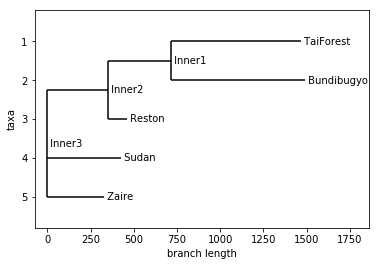

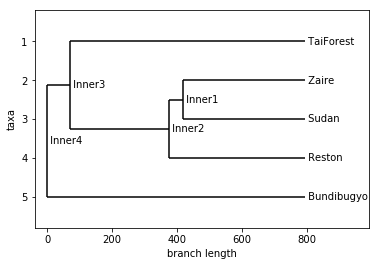

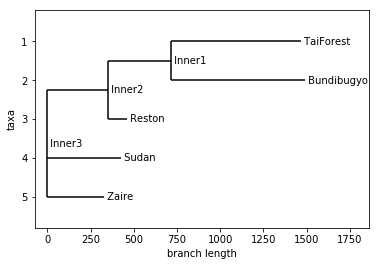

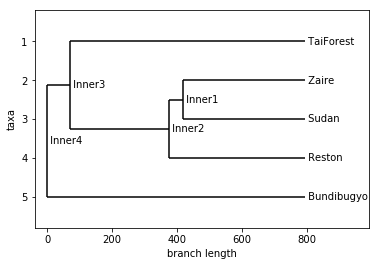

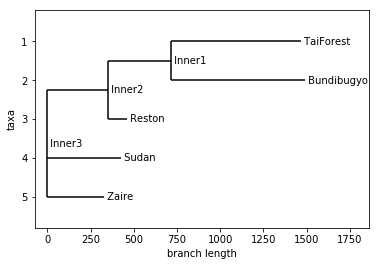

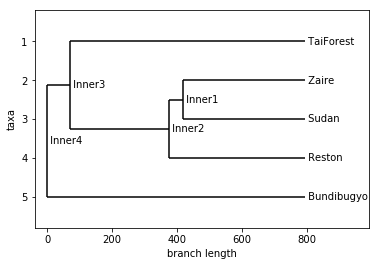

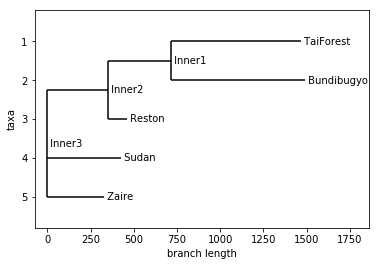

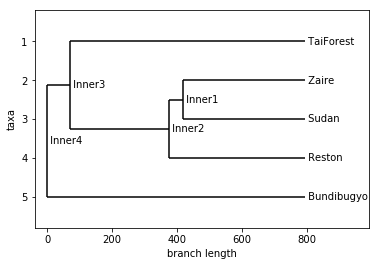

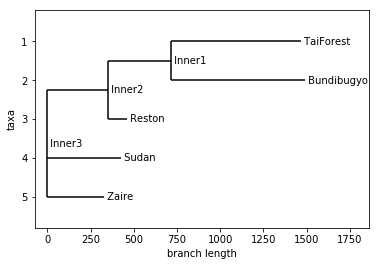

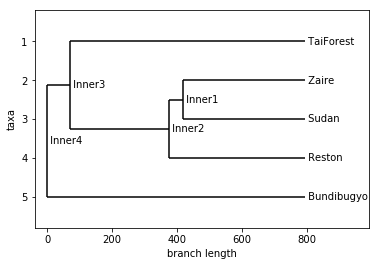

In [17]:
for gene_name in gene_names: # For all genes 
    NJ_trees.append(construct_tree(gene_name, "NJ")) # Construct NJ Tree
    UPGMA_trees.append(construct_tree(gene_name, "UPGMA")) # Construct UPGMA Tree

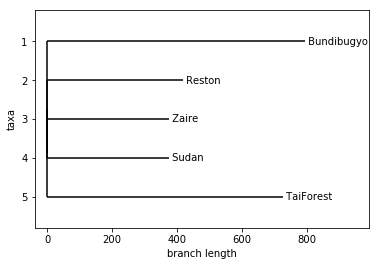

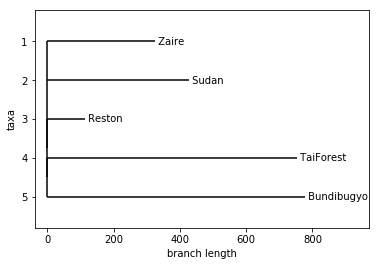

In [20]:
from Bio.Phylo.Consensus import *

NJ_trees = NJ_trees # All NJ Trees in a list
UPGMA_trees = UPGMA_trees # All UPGMA Trees in a list
NJ_trees = adam_consensus(NJ_trees) # Merge NJ Trees using Adam Consensus Algorithm 
UPGMA_trees = adam_consensus(UPGMA_trees) # Merge UPGMA Trees using Adam Consensus Algorithm
Phylo.draw(UPGMA_trees) # Draw merged UPGMA Tree
Phylo.draw(NJ_trees) # Draw merged NJ Tree

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section3" color=#FF7500 size=6>
قسمت سوم: تخمین گذشته، پیش‌بینی آینده!
</font>


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section4" color=#FF7500 size=6>
قسمت چهارم: منابع و مآخذ
</font>


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<ul style="margin-right: 0;">
<li><a href="http://biopython.org/wiki/Phylo">سایت Biopython</a></li>
<li><a href="http://www.wikipedia.org/">سایت ویکیپدیا</a></li>
<li><a href="https://github.com/Martinsos/edlib">مخزن edlb</a></li>
<li><a href="http://biopython.org/DIST/docs/api/Bio.pairwise2-module.html">هم‌ترازی pairwise</a></li>
</ul>
</div>